## The goal of this notebook is to loop through the data from our friends and evaluate the model's performance on new data.

In [12]:
import random
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from PIL import ImageFilter
from torchvision.transforms.transforms import RandomAffine, Resize
from torchvision.datasets import ImageFolder
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import shutil

In [2]:
import time

In [3]:
# Subsitute in the path to wherever your val folder is
data_path = "C:\\Users\\danis\\Downloads\\Sign Language Data From Friends!-20240406T135816Z-001\\Sign Language Data From Friends!\\"


In [4]:
classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
            'O','P','Q','R','S','T','U','V','W','X','Y','Z',
          'space','del','thumbsup','call']
classes.sort()

In [5]:
print(classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'call', 'del', 'space', 'thumbsup']


## Let's load in the data

In [195]:
image_data = []
label_data = []

people = os.listdir(data_path)

In [196]:
def resize_and_pad_image(image, output_size=(256, 256)):
    
    h, w, _ = image.shape
    pad_width = abs(h-w) // 2
    
    # Assuming all phone photos should be vertically taken
    if h < w:
        image = cv2.copyMakeBorder(image, pad_width, pad_width, 0, 0, cv2.BORDER_CONSTANT, value=[0, 0, 0])
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    
    elif h > w:
        image = cv2.copyMakeBorder(image, 0, 0, pad_width, pad_width, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    
    image = cv2.resize(image, output_size)

    return image

In [197]:
s = time.time()
for person in people:
    print(person)
    images = os.listdir(data_path + person)
    for image in images:
        try:
            img = plt.imread(data_path + person + "\\" + image)
            img = resize_and_pad_image(img)
            image_data.append(img)
            
            label = image.split(".")[0].split("_")[1]
            label = classes.index(label)
            label_data.append(label)
        
        except:
            pass
e = time.time()
print("Ran for " + str(round(e-s,3)) + " seconds!")

DI
HG
JJ
JL
SH
SL
YY
Ran for 69.484 seconds!


T


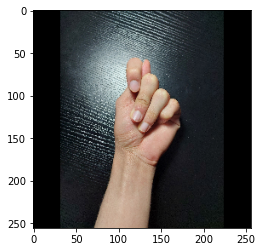

In [230]:
i = 22
plt.imshow(image_data[i])
print(classes[label_data[i]])

## Predict with model

In [234]:
prediction_count = {element: 0 for element in set(classes)}

model = torch.load("full_resnet18.pth")
model.eval()
corr = 0
total = 0

for i in range(len(image_data)):
    data = image_data[i]
    label = label_data[i]
    
    predictions = model(data)
    probabilities = F.softmax(predictions, dim=1)
    prob, pred = torch.max(F.softmax(predictions, dim=1), 1)

    # corr += pred.eq(label.view_as(pred)).sum().item()
    corr += (pred == label)
    total += data.shape[0]

FileNotFoundError: [Errno 2] No such file or directory: 'full_resnet18.pth'

In [235]:
print("The accuracy of this model is " + str(round(corr/total*100,2)) +"%")

NameError: name 'corr' is not defined

## Make new folders

In [13]:
new_folder = "C:\\Users\\danis\\Documents\\APS360 Project\\friends_data\\"

In [14]:
for cls in classes:
    os.mkdir(new_folder+cls)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\danis\\Documents\\APS360 Project\\friends_data\\A'

In [16]:
people = os.listdir(data_path)
for person in people:
    images = os.listdir(data_path + person)
    for image in images:
        label = image.split(".")[0].split("_")[1]
        image_path = data_path + person + "\\" + image
        shutil.copy(image_path, new_folder+label)